In [199]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
label = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[0]
image = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
original_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[0]
og_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\rendered.npz", allow_pickle=True)
#print(label)
#print(len(label))
data_params = ['reward', 'observation$compassAngle', 'observation$inventory$dirt', 'action$forward', 'action$left', 'action$back', 'action$right', 'action$jump', 'action$sneak', 'action$sprint', 'action$attack', 'action$camera', 'action$place']

print([len(og_label[i]) for i in data_params[3:]])
print(label.shape)
print(label)
actual_frames = len(og_label["reward"])
#image = image[-actual_frames:]
print(image.shape)


file_names = [folder_name for folder_name in os.listdir(path+"\\MineRLNavigateDense-v0")]

train_data = file_names[:1000]
#train_data = file_names[:2]
valid_data = file_names[1000:1900]

#idx = 0

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size):
        self.batch_size = batch_size
        self.data = data
        self.video_file_no = 0
        self.video_frame_no = batch_size

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
    
    '''def __next__(self):
        return self.getitem()'''

    def __getitem__(self, idx):
        #batch_x = self.data[idx * self.batch_size : (idx+1) * self.batch_size]
        video = self.data[self.video_file_no]
        
        image_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[0]])
        label_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0]
        label_part_2 = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0]
        print(label_part_2.shape)
        
        print(image_part.shape)
        no_of_frames = int(np.array(image_part[0]).shape[0]/12288)
        image_part = np.array(image_part[0]).reshape(no_of_frames, 64, 64, 3)[-label_part[0].shape[0]:]
        image_part = np.asarray(image_part[idx * self.batch_size : (idx+1) * self.batch_size]).astype("float32")
        image_part = image_part.reshape(-1, 64, 64, 3)
        plt.imshow(np.array(image_part).astype(np.uint8)[-1])
        plt.show()
        
        #observations
        x_label = label_part_2[:3]
        #actions
        y_label = label_part_2[3:]
        
        #compass angle
        x_label[1] = x_label[1]/180
        #rewards without the last frame
        x_label[0] = x_label[0][:-1]
        #objects placed
        x_label[2] = x_label[2]/64
        
        #camera action
        y_label[-2] = y_label[-2]/180
        
        for each in range(len(y_label[-1])):
            checking = y_label[-1][each]
            if checking == "none":
                y_label[-1][each] = 0
            else:
                y_label[-1][each] = 1
        
        camera_x = []
        camera_y = []
        
        for j in range(len(y_label[-2])):
            camera_x.append(y_label[-2][j][0])
            camera_y.append(y_label[-2][j][1])
        
        place = y_label[-1]
        y_label = y_label[:-2]
        final_array = []
        final_x = []
        
        for x in y_label:
            final_array.append(x)
            
        final_array.append(np.array(camera_x))
        final_array.append(np.array(camera_y))
        final_array.append(place)
        
        print(np.array(image_part).dtype)
        print(np.array(image_part).shape)
        #print(np.array([image_part, label_part]).shape)
        for x in range(len(final_array[-1])):
            final_array[-1][x] = int(x)
        
        for i in range(len(final_array)):
            final_array[i] = final_array[i][self.video_frame_no]
            print(final_array[i])
        
        
        for i in range(len(x_label)):
            x_label[i] = x_label[i][self.video_frame_no]
            print(x_label[i])
        
        final_array[-1] = int(final_array[-1])
        self.video_frame_no += batch_size
        if self.video_frame_no > no_of_frames and len(self.data) != self.video_file_no:
            self.video_file_no += 1
        
        print(np.array(image_part).shape)
        print(np.array(final_array).shape)
        print(np.array(x_label).shape)
        print(np.asarray(x_label).shape)
        print("reached the end")
        return [np.asarray(image_part).astype(np.float32), np.asarray(x_label).astype(np.float32).reshape(-1,3)], np.asarray(final_array).astype(np.float32).reshape(-1,11)
    
batch_size = 1

training_gen = DataGenerator(train_data, batch_size)
valid_gen = DataGenerator(valid_data, batch_size)

[1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792]
(16129,)
[0 0 0 ... 0 0 0]
(1832, 64, 64, 3)


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import tensorflow as tf
import tqdm
import os

(None, 3)
(None, 102400)
outputs Tensor("gru_66/Identity:0", shape=(None, 1, 11), dtype=float32)
(13,)
(1, 22511616)


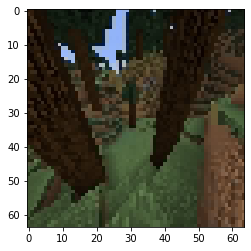

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
1
0.0
0.0
132
0.0007846461
0.017656804000000016
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
(13,)
(1, 22511616)


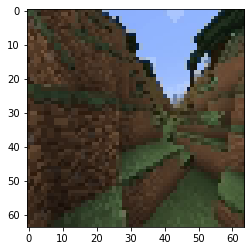

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
1
0.0
0.0
133
0.0005230949
0.013000250000000019
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
(13,)
(1, 22511616)
 1/20 [>.............................] - ETA: 0s - loss: 183.4271 - accuracy: 0.0000e+00

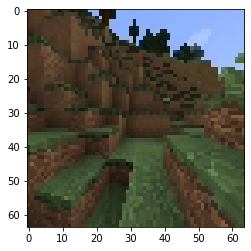

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
1
0.0
0.0
134
0.00034872885
0.001683473600000064
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 2/20 [==>...........................] - ETA: 1s - loss: 1171.6259 - accuracy: 0.0000e+00(13,)
(1, 22511616)


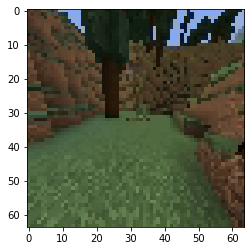

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
1
0.0
0.0
135
0.0002324854
-0.014108400000000326
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 3/20 [===>..........................] - ETA: 13s - loss: 1506.3981 - accuracy: 0.0000e+00

In [ ]:
input_1 = tf.keras.layers.Input(shape=[64,64,3])
input_2 = tf.keras.layers.Input(shape=[3])
print(input_2.shape)
input_2_p = tf.reshape(input_2, [-1, 1, 3])

conv_1 = tf.keras.layers.Conv2D(25, 3, activation="relu", padding="same")(input_1)
flatten = tf.keras.layers.Flatten()(conv_1)
print(flatten.shape)
flatten_p = tf.reshape(flatten, [-1, 1, 102400])

dense_and_stats = tf.keras.layers.concatenate([flatten_p, input_2_p])
gru_1 = tf.keras.layers.GRU(25, return_sequences=True)(dense_and_stats)
#gru_2 = tf.keras.layers.GRU(25, return_sequences=True)(gru_1)
outputs = tf.keras.layers.GRU(11, return_sequences=True)(gru_1)

print("outputs", outputs)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=[tf.reshape(outputs, [-1, 11])])
    
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics="accuracy")

model.fit_generator(generator = training_gen,
                    steps_per_epoch = 20,
                    epochs = 1,
                    verbose = 1,
                    validation_data = valid_gen,
                    validation_steps = 5)
